In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from os.path import join

# Reading the dataset
First we need to get an image about the dataset we are provided(Even though the explanation is provided from the source where the data set is obtained, we should double check the dataset)


In [0]:
# reading the csv file
datapath = "/content/drive/My Drive/CS210"
fileName = "googleplaystore.csv"
df = pd.read_csv(join(datapath,fileName))
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

As can be seen, almost all of our data is in object dtype, it is dificult to make predictions with object types since we dont know what object is. With that and the possiblity of NaN values, we need to clean the dataset to our needs.

# Cleaning the dataset
Data comes with unexpected values, or values such that with cleaning the value the performance of trained models will be better, and NaN values should be taken care of as well since we can not make any assumption on NaN values.

First thing to note is that every data in "Size" collumn have an additional "M" after the size to denote tha size is in megabytes. This is not necessary if all of them have M, and if not we can convert the values to megabyte values to make more effective predictions.

In [0]:
df["Size"].str.contains("k").sum()

316

This shows that there are 316 apps with size denoted by kilobytes. We need to convert them to megabytes to be on the same unit

In [0]:
df["Size"].str.contains("G").sum()
df["Size"].str.contains("g").sum()

0

This shows that there are no apps with size denoted by gigabytes.

In [0]:
df["Size"] = df["Size"].map(lambda x: x.rstrip('M')) # Strip M from size values
df['Size'] = df['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x) # Conver Kilobyte to megabyte if k exists in the value
df['Size'] = df['Size'].map(lambda x: np.nan if x.startswith('Varies') else x) # place NaN if the size varies

Since the collumns containing version data is not needed, both of them are dropped.

In [0]:
df.drop("Current Ver",axis = 1,inplace = True)
df.drop("Android Ver",axis = 1,inplace = True)

In the installs column, we should remove the + sign, since it is not a significant number, and remove the , character as well.

In [0]:
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+')) # Removing + sign
df['Installs'] = df['Installs'].map(lambda x: ''.join(x.split(','))) # Removing , character

Remove the $ sign in the price collumn

In [0]:
df['Price'] = df['Price'].map(lambda x: x.lstrip('$').rstrip())

In [0]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

We can see that there is a value in 1.9, which is not a category value. Hence we remove the entries with that category value.




In [0]:
df[df["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19


In [0]:
df.drop(df.index[10472], inplace=True) # Removing the index 10472 since it has a missing category value

In [0]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Since there is an unrated value in Content Rating collumn, we remove the entry.

In [0]:
df[df["Content Rating"] == "Unrated"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
7312,Best CG Photography,FAMILY,NaN,1,2.5M,500,Free,0,Unrated,Entertainment,"June 24, 2015"
8266,DC Universe Online Map,TOOLS,4.1,1186,6.4M,50000,Free,0,Unrated,Tools,"February 27, 2012"


In [0]:
df.drop(df.index[[7312,8266]], inplace=True) # indexex 7312 and 8266 are dropped since they have Unrated content rating

We need to make Numerical collumns for Content Rating and Category

In [0]:
# Use a label encoder to make numeric data
lb_make = LabelEncoder()

# Create column for "numeric" Content Rating 
df["Content Rating NUMERICAL"] = lb_make.fit_transform(df["Content Rating"])
# Form dicitonary for Content Rating and numeric values 
dict_content_rating = {"Adults only 18+": 0, "Everyone": 1, "Everyone 10+": 2, "Mature 17+": 3, "Teen": 4}
# Numeric value for Content Rating

# Create column for "numeric" Category
df["Category NUMERICAL"] = lb_make.fit_transform(df["Category"])

# Form dicitonary for Category and numeric values
dict_category = {}
val = 0
for i in df["Category"].unique():
 dict_category[i] = val
 val += 1
 
 # Therefore, the Numerical values for Categories become

'''
ART_AND_DESIGN = 0
AUTO_AND_VEHICLES = 1
BEAUTY = 2 
BOOKS_AND_REFERENCE = 3
BUSINESS = 4
COMICS = 5
COMMUNICATION = 6
DATING = 7
EDUCATION = 8
ENTERTAINMENT = 9
EVENTS = 10
FAMILY = 11
FINANCE = 12
FOOD_AND_DRINK = 13
GAME = 14
HEALTH_AND_FITNESS = 15
HOUSE_AND_HOME = 16
LIBRARIES_AND_DEMO = 17
LIFESTYLE = 18
MAPS_AND_NAVIGATION = 19
MEDICAL = 20
NEWS_AND_MAGAZINES = 21
PARENTING = 22
PERSONALIZATION = 23
PHOTOGRAPHY = 24
PRODUCTIVITY = 25
SHOPPING = 26
SOCIAL = 27
SPORTS = 28
TOOLS = 29
TRAVEL_AND_LOCAL = 30
VIDEO_PLAYERS = 31
WEATHER = 32
'''

'\nART_AND_DESIGN = 0\nAUTO_AND_VEHICLES = 1\nBEAUTY = 2 \nBOOKS_AND_REFERENCE = 3\nBUSINESS = 4\nCOMICS = 5\nCOMMUNICATION = 6\nDATING = 7\nEDUCATION = 8\nENTERTAINMENT = 9\nEVENTS = 10\nFAMILY = 11\nFINANCE = 12\nFOOD_AND_DRINK = 13\nGAME = 14\nHEALTH_AND_FITNESS = 15\nHOUSE_AND_HOME = 16\nLIBRARIES_AND_DEMO = 17\nLIFESTYLE = 18\nMAPS_AND_NAVIGATION = 19\nMEDICAL = 20\nNEWS_AND_MAGAZINES = 21\nPARENTING = 22\nPERSONALIZATION = 23\nPHOTOGRAPHY = 24\nPRODUCTIVITY = 25\nSHOPPING = 26\nSOCIAL = 27\nSPORTS = 28\nTOOLS = 29\nTRAVEL_AND_LOCAL = 30\nVIDEO_PLAYERS = 31\nWEATHER = 32\n'

Replace NaN values in ratings collumn with the mean of the ratings.

In [0]:
df["Rating"].fillna(value = df["Rating"].mean(),inplace = True)

In [0]:
df.isnull().sum()

App                            0
Category                       0
Rating                         0
Reviews                        0
Size                        1695
Installs                       0
Type                           1
Price                          0
Content Rating                 0
Genres                         0
Last Updated                   0
Content Rating NUMERICAL       0
Category NUMERICAL             0
dtype: int64

At that point, we cleared our data as best as possible but there are still NaN values in Size, which we can not make any asusmption on, and 1 NaN value in Type collumn. Therefore, we delete them from our data.

In [0]:
df.dropna(axis=0, inplace=True)

In [0]:
# Change the datatype to numeric
df['Reviews'] = pd.to_numeric(df['Reviews']) 
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = pd.to_numeric(df['Price'])
df["Size"] = pd.to_numeric(df["Size"])

In [0]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Content Rating NUMERICAL,Category NUMERICAL
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1,0
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",1,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",4,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.191767,0,9.6,10,Free,0.0,Everyone,Business,"September 29, 2016",1,4
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53,5000,Free,0.0,Everyone,Education,"July 25, 2017",1,11
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1,11
10838,Parkinson Exercices FR,MEDICAL,4.191767,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1,20


In [0]:
df.dtypes

App                          object
Category                     object
Rating                      float64
Reviews                       int64
Size                        float64
Installs                      int64
Type                         object
Price                       float64
Content Rating               object
Genres                       object
Last Updated                 object
Content Rating NUMERICAL      int64
Category NUMERICAL            int64
dtype: object

# Data Visualization

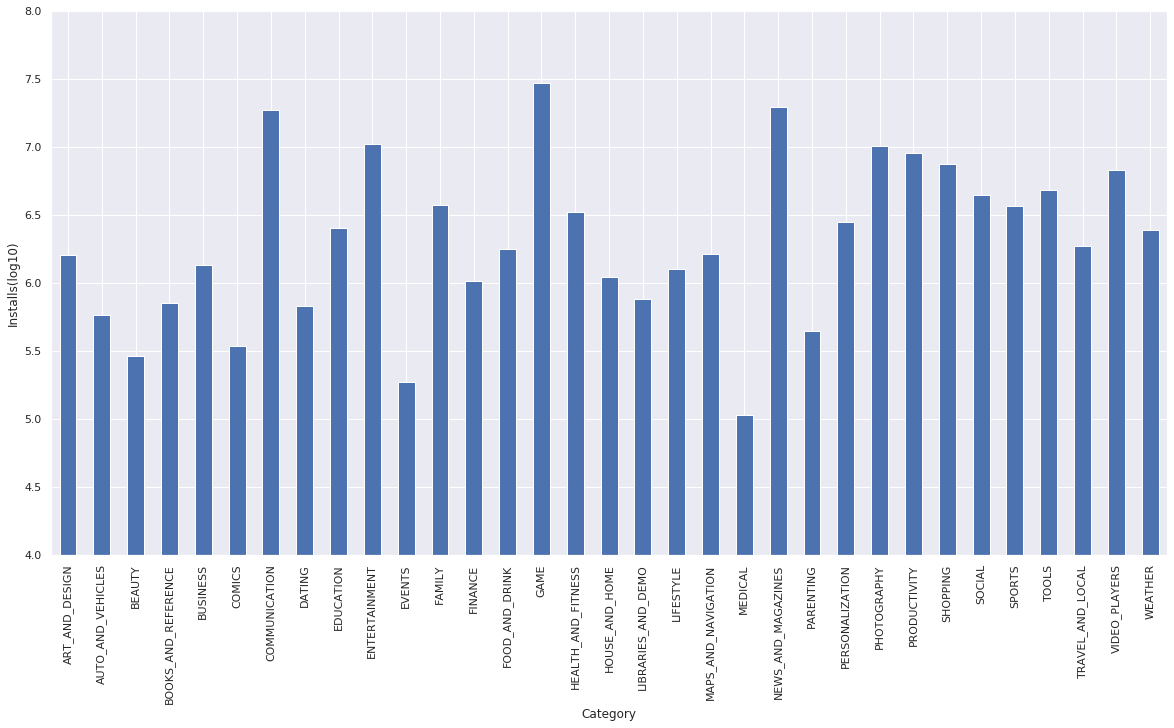

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plot = df.groupby("Category")["Installs"].mean().apply(np.log10)
plt.figure(figsize=(20,10))
plt.ylim((4,8))
plt.ylabel("Installs(log10)")
plot.plot(kind = 'bar')



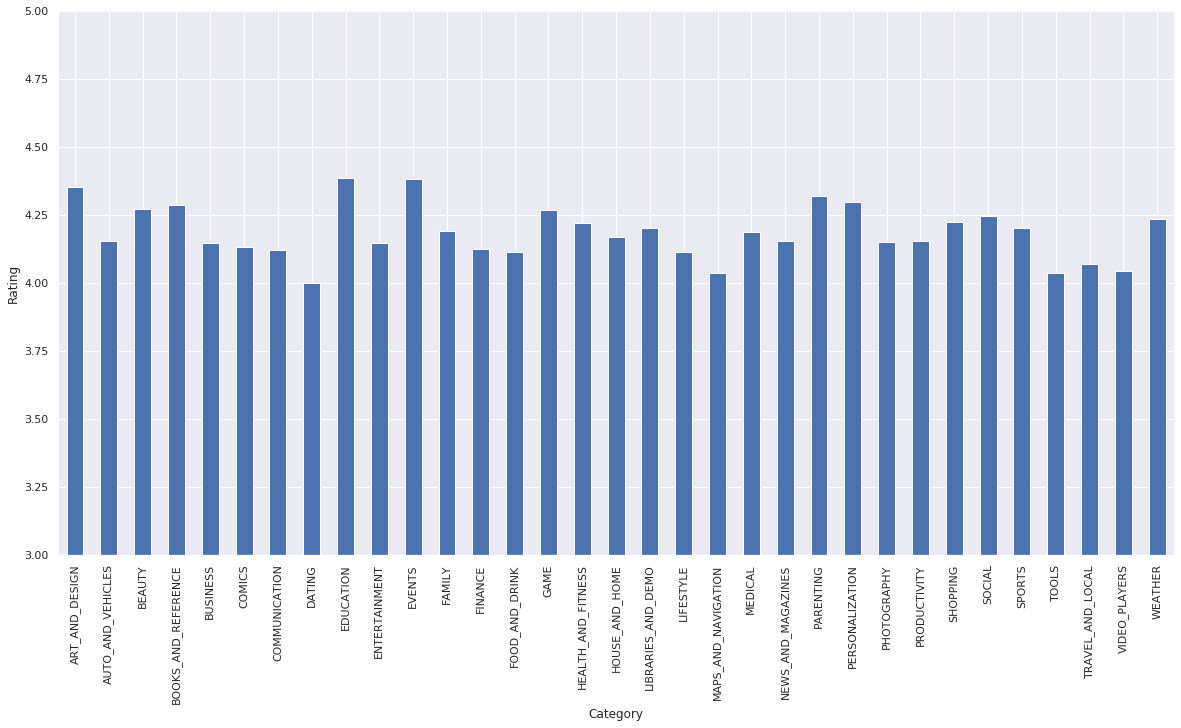

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plot2 = df.groupby("Category")["Rating"].mean()
plt.figure(figsize=(20,10))
plt.ylim((3,5))
plt.ylabel("Rating")
plot2.plot(kind = 'bar')

# Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

df_y = df["Installs"]
df_x = df.drop(["Installs","App","Category","Type","Content Rating","Genres","Last Updated"],axis = 1)

X_train_valid,X_test,y_train_valid,y_test = train_test_split(df_x, df_y, test_size= 0.125, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_valid, y_train_valid, test_size=0.142, random_state=42)

In [0]:
df_x.dtypes

Rating                      float64
Reviews                       int64
Size                        float64
Price                       float64
Content Rating NUMERICAL      int64
Category NUMERICAL            int64
dtype: object

# Feature generation
As the purpose of the project suggests, we are going to predict the number of installments before releasing an app to Playstore, and after putting an app and collecting some number of reviews, we will try to predict the optimal price for the app. We are going to use features:

1)Category

2)Rating

3)Reviews

4)Installs

5)Price

6)Size

7)Content Rating

# Model Selection
This problem is a regression problem, and we are going to use Random Forest model for the purpose of this problem

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss

rf= RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)


rf_predictions = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)
rf_ham = hamming_loss(y_test,rf_predictions)
print(rf_ham)
print(rf_acc)

0.4671916010498688
0.5328083989501312


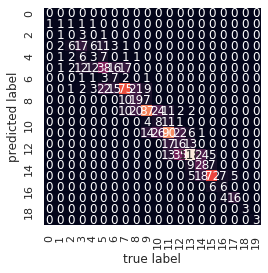

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, rf_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Since the numbers are closer to middle section of the matrix, model seems to be fairly good.

In [0]:
from sklearn import tree
treeModel = tree.DecisionTreeClassifier(random_state=42) #Create decision tree classifier object
treeModel.fit(X_train, y_train) #train the classifier using the training data

t_predictions = treeModel.predict(X_test)
t_acc = accuracy_score(y_test,t_predictions)
print(t_acc)


0.4671916010498688


Since Random Forests give better approximations for test data the model that is going to be used is random forests.

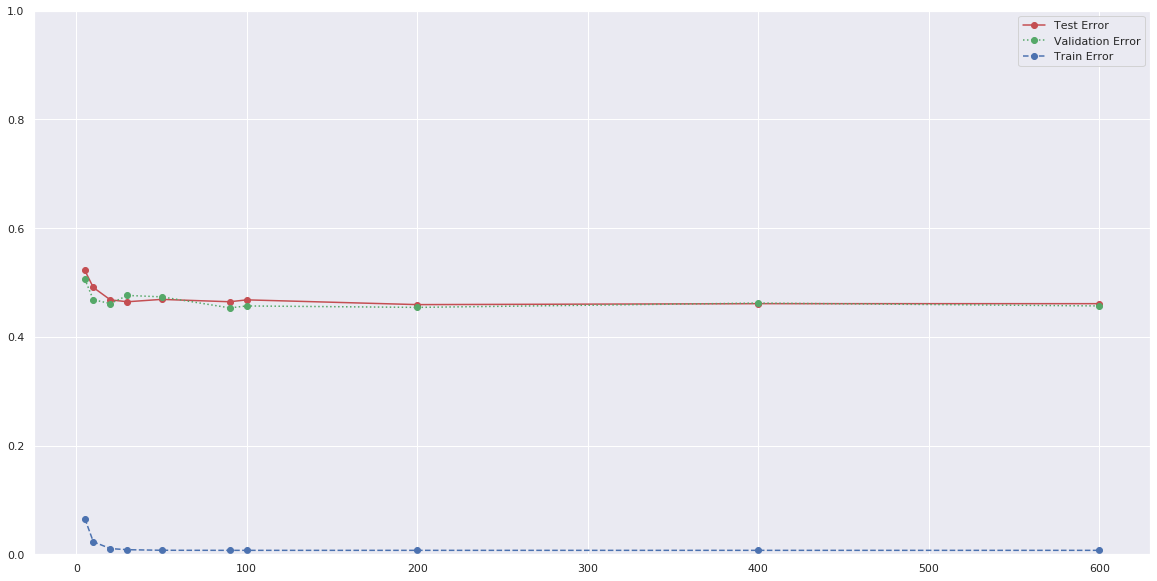

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
n_estimators=[5,10,20,30,50,90,100,200,400,600]
valError = list()
testError = list()
trainError = list()
minError = 2
bestEst = -1
# Use the n_estimators values above.

#Draw the graph below. 
for estimator in n_estimators:
  rf_graph = RandomForestClassifier(n_estimators= estimator)
  rf_graph.fit(X_train,y_train)
  rf_predictionsTest = rf_graph.predict(X_test)
  rf_predictionsVal = rf_graph.predict(X_val)

  rf_predictionsTrain = rf_graph.predict(X_train)

  testError_graph = 1 - accuracy_score(y_test, rf_predictionsTest)
  validationError_graph = 1 - accuracy_score(y_val, rf_predictionsVal)
  trainError_graph = 1 - accuracy_score(y_train,rf_predictionsTrain)
  if(minError > testError_graph):
    minError = testError_graph
    bestEst = estimator


  valError.append(validationError_graph)
  testError.append(testError_graph)
  trainError.append(trainError_graph)

plt.figure(figsize=(20,10))
plt.ylim((0,1))
plt.plot(n_estimators,testError,"r",label = "Test Error",linestyle = "-",marker = "o")
plt.plot(n_estimators,valError,"g",label = "Validation Error",linestyle = ":",marker = "o")
plt.plot(n_estimators,trainError,"b",label = "Train Error",linestyle = "--",marker = "o")

plt.legend()
plt.show()

In [0]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending = False)
print(feature_importances.iloc[:3])

                    importance
Reviews               0.474009
Size                  0.214533
Category NUMERICAL    0.136512
